In [7]:
#https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial

import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:

sample_rate, signal = scipy.io.wavfile.read('cero_1.wav')  # File assumed to be in the same directory

#signal, sample_rate = librosa.load('cero1.wav', sr=11025)  # sr is the sample rate, default is 22050 Hz
audio=signal

#signal=np.array(signal[1,])
signal.shape
#signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds



print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(signal) / sample_rate))

Sample rate: 11025Hz
Audio duration: 0.4723809523809524s


In [9]:
import pandas as pd
#signal
#data = pd.read_csv("archivo_cero1.csv",index_col=0)
#data = np.loadtxt('archivo_cero1.csv', delimiter=',')
#audio=np.transpose(data)
print (signal[110:228])

[ -14  -48  -67  -97  -73  -70  -98  -64  -95  -75 -101  -96  -60  -32
   45   47    6   12  -19   -3   -1  -44  -50  -67  -85  -91  -81 -197
 -199 -147 -146 -104 -192 -130 -106  -55 -123 -113 -107 -163 -112 -100
 -114 -190 -140 -166 -164 -200 -208 -111  -97  -69  -63 -111  -64  -30
  -28   27   47   81   82    4  -15  -15    7   11   36   20   55   61
   32   -4   36   55   51   42   12   -3   83  118  113   91   84   68
   93  120  139  169  120  131  152  161  157  110  105  109   10  -48
   10  105  132   85  113  152  157  148  117  107   80   30  103  128
  133   79   32   84   95  106]


(5208,)
[129  64 104 141 144  88  45 100 130 199 266 293 298 317 310 329 305 326
 381 392 410 459 459 418 354 355 428 440 413 449]


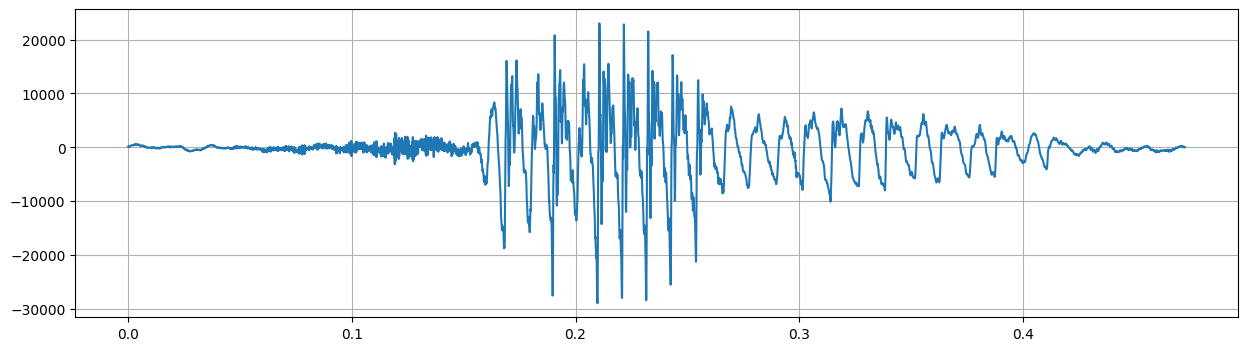

In [10]:
#audio = normalize_audio(signal)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)
print (audio.shape)
print (audio[0:30])

In [11]:
audio[0:20]
#print (audio.shape, " ", audio.size)

array([129,  64, 104, 141, 144,  88,  45, 100, 130, 199, 266, 293, 298,
       317, 310, 329, 305, 326, 381, 392], dtype=int16)

In [12]:
signal=audio
pre_emphasis = 0.97
emphasized = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
audio=emphasized
audio[0:20]

array([129.  , -61.13,  41.92,  40.12,   7.23, -51.68, -40.36,  56.35,
        33.  ,  72.9 ,  72.97,  34.98,  13.79,  27.94,   2.51,  28.3 ,
       -14.13,  30.15,  64.78,  22.43])

In [13]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    #print (sample_rate)
    #audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    print(audio[120:130]);
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    print (frame_len)
    frames = np.zeros((frame_num,FFT_size))
  
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
        
    
    return frames

In [14]:
hop_size = 10 #ms
FFT_size = 256
print (audio.shape, " ", audio.size)

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

(5208,)   5208
[-28.25   1.97  33.12  26.2   76.04   3.35 -39.59   6.18 -30.64  15.43]
110
Framed audio shape: (46, 256)


In [15]:
print("First frame:")
#audio_framed[1]
print (len (audio_framed[1]))

First frame:
256


In [16]:
#print("Last frame:")
#audio_framed[2,0:10]
pre_emphasis = 0.97
frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
print (frame_len)

frame_num = int((len(audio) - FFT_size) / frame_len) + 1
print (frame_num)
print( audio_framed[0,0:10])

for n in range(frame_num):
    for i in range(FFT_size-1,0,-1):
    #print (i)
       audio_framed[n,i]= audio_framed[n,i] - (audio_framed[n,i-1]*pre_emphasis);
    #audio_framed[n,0]= audio_framed[n,0] * (1-pre_emphasis);   
print( audio_framed[0,0:10])


110
46
[129.   -61.13  41.92  40.12   7.23 -51.68 -40.36  56.35  33.    72.9 ]
[ 129.     -186.26    101.2161   -0.5424  -31.6864  -58.6931    9.7696
   95.4992  -21.6595   40.89  ]


In [17]:
audio_framed[0,0:30]

array([ 129.    , -186.26  ,  101.2161,   -0.5424,  -31.6864,  -58.6931,
          9.7696,   95.4992,  -21.6595,   40.89  ,    2.257 ,  -35.8009,
        -20.1406,   14.5637,  -24.5918,   25.8653,  -41.581 ,   43.8561,
         35.5345,  -40.4066,    8.0029,   32.4328,  -45.691 ,  -40.5869,
        -25.0469,   61.5362,   72.3786,  -56.3005,  -37.8948,   61.776 ])

array([0.08      , 0.08013854, 0.08055409, 0.08124639, 0.08221503,
       0.08345941, 0.08497881, 0.08677228, 0.08883877, 0.09117702,
       0.09378562, 0.09666301, 0.09980745, 0.10321704, 0.10688973,
       0.11082331, 0.11501542, 0.11946351, 0.12416493, 0.12911682,
       0.13431622, 0.13975998, 0.14544484, 0.15136736, 0.15752398,
       0.16391099, 0.17052454, 0.17736064, 0.18441519, 0.19168393,
       0.19916248, 0.20684634, 0.21473088, 0.22281135, 0.23108288,
       0.23954049, 0.24817909, 0.25699347, 0.26597832, 0.27512823,
       0.28443769, 0.29390109, 0.30351274, 0.31326683, 0.3231575 ,
       0.33317879, 0.34332466, 0.353589  , 0.36396562, 0.37444828,
       0.38503067, 0.3957064 , 0.40646905, 0.41731213, 0.42822912,
       0.43921343, 0.45025845, 0.46135753, 0.47250398, 0.48369109,
       0.49491212, 0.5061603 , 0.51742887, 0.52871103, 0.54      ,
       0.55128897, 0.56257113, 0.5738397 , 0.58508788, 0.59630891,
       0.60749602, 0.61864247, 0.62974155, 0.64078657, 0.65177

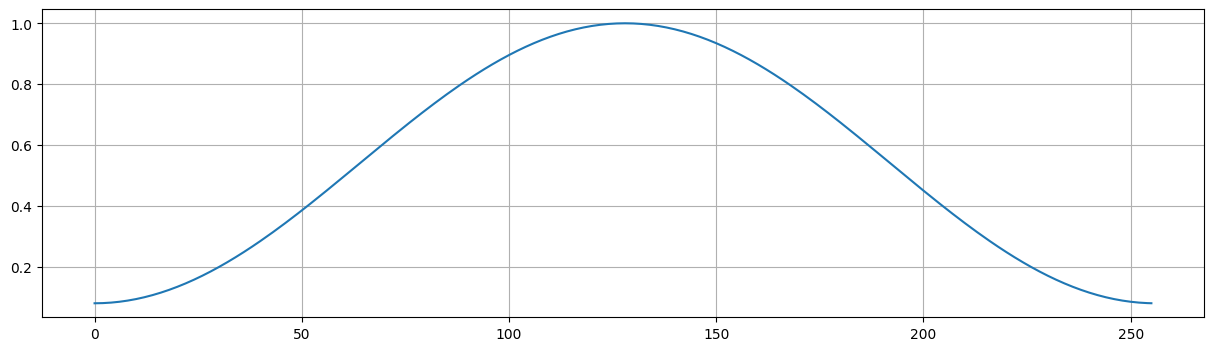

In [18]:
#window = get_window("hamm", FFT_size, fftbins=True)
window = get_window("hamm", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)
window

[ 129.     -186.26    101.2161   -0.5424  -31.6864  -58.6931    9.7696
   95.4992  -21.6595   40.89      2.257   -35.8009  -20.1406   14.5637
  -24.5918   25.8653  -41.581    43.8561   35.5345  -40.4066    8.0029
   32.4328  -45.691   -40.5869  -25.0469]
(46, 256)


array([ 1.03200000e+01, -1.49266051e+01,  8.15337084e+00, -4.40680419e-02,
       -2.60509819e+00, -4.89849174e+00,  8.30208937e-01,  8.28668375e+00,
       -1.92420336e+00,  3.72822836e+00,  2.11674152e-01, -3.46062275e+00,
       -2.01018184e+00,  1.50322196e+00, -2.62861086e+00,  2.86647823e+00,
       -4.78245597e+00,  5.23920375e+00,  4.41213853e+00, -5.21717176e+00,
        1.07491926e+00,  4.53280761e+00, -6.64552016e+00, -6.14353190e+00,
       -3.94548733e+00,  1.00864592e+01,  1.23423271e+01, -9.98549290e+00,
       -6.98837680e+00,  1.18414665e+01, -7.86060460e+00,  1.55225976e+01,
       -7.82936706e+00,  3.59635343e+00, -3.92702248e+00, -1.58470887e+01,
        1.38443230e+01, -1.30495629e+01,  2.02444079e+01, -1.57491654e+01,
       -2.50555475e+00,  4.02391745e+00, -3.47085026e+00,  1.59424310e+01,
       -6.79034699e+00,  2.58649692e+01, -4.07685671e+01,  6.66727410e-01,
        1.45899259e+01, -6.15218529e+00, -9.02827610e+00,  2.57835563e+01,
       -1.98584112e+01,  

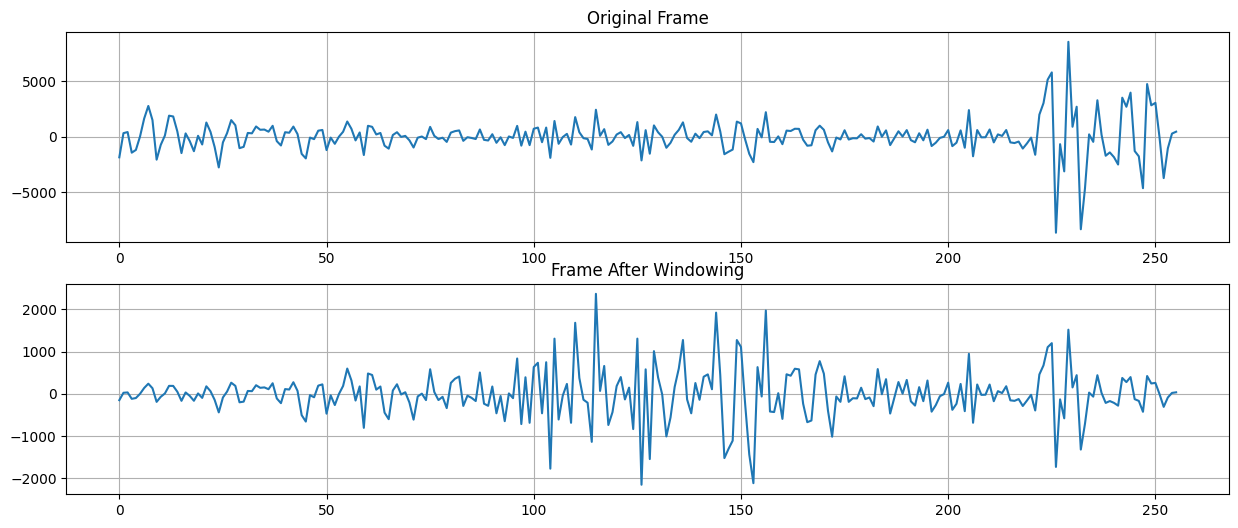

In [19]:
#audio_win *= 0.54 - 0.46 * np.cos((2 * np.pi * n) / (FFT_size - 1))  
#audio_win *= np.hamming(FFT_size)
print (audio_framed[0,0:25])

audio_win = audio_framed * window

ind = 17
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)
print (audio_win.shape)
audio_win[0,0:253]


In [20]:
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')
print(audio_fft.shape)

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)
audio_fft[0,0:255]
#audio_fft.shape

(129, 46)


array([-3.9083290e+00-0.00000000e+00j, -1.5895017e+00+1.98738060e+01j,
        3.2703905e+00-1.15872707e+01j,  1.1000560e+01-4.97574568e+00j,
       -2.9961155e+01+1.36080685e+01j,  3.8300148e+01-1.78700714e+01j,
       -5.0926624e+01-8.78908455e-01j,  8.7593641e+00+6.47235298e+00j,
        2.3256424e+01+3.47987938e+01j, -1.3807347e+00-2.35783157e+01j,
       -6.7792236e+01-3.88313255e+01j,  9.2759285e+01+4.59066429e+01j,
       -7.0917610e+01+4.50724792e+01j,  9.4735085e+01-1.17404312e+02j,
       -1.9836549e+02+8.71788025e+01j,  8.2886101e+01-6.53674622e+01j,
        5.5029273e+00+3.69691620e+01j,  1.6557041e+01+7.18758011e+01j,
       -9.5737600e+00+1.38127432e+01j, -4.2908314e+01-2.65342655e+01j,
       -6.4718552e+01+1.12804098e+01j,  5.6639519e+01-7.11532669e+01j,
       -1.2829149e+01-8.02052994e+01j, -8.2862282e+01+2.29476944e+02j,
       -8.1331573e+01-5.89968719e+01j,  2.8864008e+01-2.71812820e+01j,
        1.2614303e+02-1.81694374e+01j, -3.5508389e+01+1.10787727e+02j,
      

In [21]:
#audio_power = np.square(np.abs(audio_fft))
#audio_power = np.sqrt(np.abs(audio_fft))
#audio_power[0,1]
#audio_power = np.sqrt(np.abs(audio_fft))
#print(audio_power.shape)
audio_power = (np.abs(audio_fft))
audio_power[0,0:128]

array([   3.908329,   19.937267,   12.039946,   12.073541,   32.906693,
         42.263943,   50.934208,   10.891181,   41.854717,   23.61871 ,
         78.12592 ,  103.49736 ,   84.028786,  150.85924 ,  216.6772  ,
        105.560455,   37.376476,   73.75816 ,   16.806213,   50.44988 ,
         65.69428 ,   90.94406 ,   81.22486 ,  243.97914 ,  100.47615 ,
         39.64786 ,  127.44486 ,  116.33902 ,  177.38689 ,  397.40244 ,
        236.01874 ,  256.2298  ,  124.35157 ,  339.54688 ,  315.83826 ,
        240.3555  ,  757.1579  ,  359.1082  ,  290.20734 ,  328.70334 ,
        150.71399 ,  181.17046 ,  430.44226 ,  201.26927 ,  110.92367 ,
        282.43225 ,  411.12338 ,  385.56934 ,  509.154   ,  287.4545  ,
        436.88712 ,  898.07715 ,  988.2968  ,  673.86487 ,  186.33339 ,
        382.67203 ,  500.60458 ,  223.14148 ,  259.39865 ,  513.88574 ,
        268.0413  ,  187.20212 ,  772.1888  ,  911.42676 ,  116.34864 ,
         95.910645,  469.4184  ,  792.9067  ,  592.28076 ,  672.

In [22]:
freq_min = 0
freq_high = sample_rate / 2
mel_filter_num = 28

print("Minimum frequency: {0}".format(freq_min))
print("Maximum frequency: {0}".format(freq_high))

Minimum frequency: 0
Maximum frequency: 5512.5


In [23]:
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [24]:
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min: {0}".format(fmin_mel))
    print("MEL max: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    print (mels)
    freqs = met_to_freq(mels)
    print(freqs)
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs, mels

In [25]:
filter_points, mel_freqs, mels = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=sample_rate)
# mel_freqs representa las frecuencias centrales del banco de filtros
# filter_points representa el índice dentro del arreglo de la fft de la señal que se toma como referencia a la frecuencia central del banco de filtros
#filter_points
mels

MEL min: 0.0
MEL max: 2460.4968986819067
[   0.           84.84472064  169.68944129  254.53416193  339.37888258
  424.22360322  509.06832387  593.91304451  678.75776515  763.6024858
  848.44720644  933.29192709 1018.13664773 1102.98136837 1187.82608902
 1272.67080966 1357.51553031 1442.36025095 1527.2049716  1612.04969224
 1696.89441288 1781.73913353 1866.58385417 1951.42857482 2036.27329546
 2121.11801611 2205.96273675 2290.80745739 2375.65217804 2460.49689868]
[   0.           54.7332802   113.74617748  177.37331683  245.97548767
  319.94168971  399.69133869  485.67664465  578.3851761   678.34262474
  786.11578629  902.31577449 1027.60148628 1162.68333802 1308.32729382
 1465.35920882 1634.66951212 1817.2182558  2014.04055882 2226.25247649
 2455.05732896 2701.75252443 2967.73691598 3254.51873357 3563.72413627
 3897.10643318 4256.55602534 4644.11112498 5061.969313   5512.5       ]


array([   0.        ,   84.84472064,  169.68944129,  254.53416193,
        339.37888258,  424.22360322,  509.06832387,  593.91304451,
        678.75776515,  763.6024858 ,  848.44720644,  933.29192709,
       1018.13664773, 1102.98136837, 1187.82608902, 1272.67080966,
       1357.51553031, 1442.36025095, 1527.2049716 , 1612.04969224,
       1696.89441288, 1781.73913353, 1866.58385417, 1951.42857482,
       2036.27329546, 2121.11801611, 2205.96273675, 2290.80745739,
       2375.65217804, 2460.49689868])

In [26]:
def Melk (k, fres):
    valor = 1127 * np.log ( 1 + (k-1) * fres) 

    return valor


In [27]:
def do_melk (filter_points, FFT_size, num_chan):
    fres = sample_rate/(FFT_size*700)
    #print (fres)
    chan = 0
    Nby2 = int (FFT_size / 2)
    maxChan = num_chan
    fblowChan = np.zeros((Nby2,), dtype=int)
    
    for k in range (0, Nby2 -1):
        melk = Melk (k,fres)
#        print (melk)
        if (k < 2 or k > Nby2):
            fblowChan [k] = -1
        else:
           # print (melk)
            #print (mels[chan])
            while (mels[chan] < melk and chan <= maxChan):
                chan+=1
            fblowChan[k] = chan -1


    for k in range (0, Nby2 -2):
        fblowChan [k] = fblowChan [k+1]
    fblowChan[Nby2-1] = num_chan
    
    return fblowChan
    

In [28]:
lowChan= do_melk(filter_points, FFT_size, mel_filter_num)


print(lowChan)
print(lowChan.shape)

lowChan[5]


[-1  0  1  2  2  3  4  4  5  5  6  6  7  7  8  8  9  9  9 10 10 11 11 11
 12 12 12 13 13 13 13 14 14 14 14 15 15 15 16 16 16 16 16 17 17 17 17 18
 18 18 18 18 19 19 19 19 19 19 20 20 20 20 20 21 21 21 21 21 21 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 25 25 25 25 25
 25 25 25 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28
 28 28 28 28 28 28 28 28]
(128,)


np.int64(3)

In [29]:
def create_vector_lowerChanWeights (filter_points, FFT_size, lowChan):
    Nby2 = int (FFT_size / 2)
    fblowWt = np.zeros(Nby2)
    fres = sample_rate/(FFT_size*700)
    fbklo=2
    fbkhi = Nby2
    
    for k in range (0,Nby2 ):
        chan =  (lowChan[k])
        #print (chan)
        if (k < (fbklo-1) or k> fbkhi):
            fblowWt [k] = 0.0
        else:
            if (chan > 0):
                #print ( mels[chan])
                #print ( mels[chan+1])
                #print (Melk (k+1,fres))
                fblowWt[k]=(( mels[chan+1]) - Melk (k+1,fres)) / ((mels[chan+1]) - (mels[chan]))
            else:
                fblowWt[1] = (( mels [1]) - Melk (k+1,fres)) / (( mels[1] - 0))
    return fblowWt          

In [30]:
lowWt= create_vector_lowerChanWeights(filter_points, FFT_size, lowChan )
print(lowWt.shape)

print(lowWt)

(128,)
[0.         0.20693207 0.45855838 0.75010896 0.07753893 0.43738858
 0.82667568 0.24281146 0.68353431 0.14685688 0.63102342 0.13447517
 0.65582194 0.19381863 0.74734575 0.31539305 0.89704574 0.49147286
 0.09791732 0.71568742 0.34414949 0.98272162 0.63086811 0.28809479
 0.95394476 0.62799476 0.30985197 0.9991511  0.69555195 0.39873711
 0.10840998 0.82429302 0.54612609 0.27366509 0.00668062 0.74495687
 0.48829051 0.23648979 0.98937367 0.746771   0.50851988 0.27446695
 0.0444668  0.81838148 0.59607993 0.3774376  0.16233597 0.95066218
 0.74230869 0.53717295 0.33515707 0.13616759 0.94011516 0.74691433
 0.55648335 0.36874391 0.18362098 0.00104265 0.82093989 0.64324649
 0.46789881 0.29483574 0.12399852 0.9553306  0.78877759 0.62428711
 0.4618087  0.30129373 0.14269531 0.98596821 0.83106879 0.67795491
 0.52658588 0.37692238 0.2289264  0.08256119 0.9377912  0.79458204
 0.65290041 0.51271406 0.37399177 0.23670327 0.10081922 0.96631118
 0.83315156 0.70131359 0.5707713  0.44149946 0.31347359

In [31]:

audio_window = audio_win
print(audio_window.shape)

#audio_window[45,0:]
#mag_frames = np.fft((np.transpose(audio_window)), FFT_size)  # Magnitude of the FFT
mag_frames = np.absolute(np.fft.fft((audio_window), FFT_size))  # Magnitude of the FFT

#mag_frames = np.absolute(np.fft.rfft((np.transpose(audio_winT)), FFT_size))  # Magnitude of the FFT

#pow_frames = ((1.0 / FFT_size) * ((mag_frames) ** 2))  # Power Spectrum
#pow_frames = mag_f.rames

(46, 256)


In [32]:
print(mag_frames.shape)
mag_frames[45,0:135]

(46, 256)


array([  56.02005658,   61.32850401,   24.89480968,   79.30000615,
         32.76265593,   16.83453251,   21.679608  ,   47.98957756,
         56.30277752,   19.29166965,   87.23788017,  213.36080222,
        161.42843602,  272.7805599 ,  361.07882795,  283.09607839,
        315.20742188,  282.76336756,   75.96470328,  489.62300569,
        839.57591717,  294.85930146,  799.74411751,  805.66475813,
        292.66345547,  199.62030106,  441.51675283,  578.38069935,
        564.28188119,  499.6493137 ,  616.03639211,  526.16420093,
        138.69504232,  312.44269394,  363.58321778,  206.07890458,
        643.56333412,  944.32338318,  512.31869734,  128.27769775,
        129.86703789,  259.80506015,  652.68833784, 1281.32616587,
        952.9723539 ,  339.8054391 ,  170.30158989,  792.3045791 ,
        193.18325217,  349.50676763,  462.77261617,  664.37660667,
        443.81211511,  106.52539626,  277.00522938,  889.67325987,
       1139.62315846,  752.12322058,  314.66194449,  412.04951

In [33]:
def fill_bins (ek, lowchan, lowWt, numChans):
    valor= ek.shape[0]

    Nby2 = int (FFT_size / 2)
    
    fbank = np.zeros((valor,numChans+1))
    fbklo=2
    fbkhi = Nby2
    #print (numChans)
    for j in range (0,valor):
        for k in range (fbklo, fbkhi):
        #for k in range (klow, khigh):
            bin = lowchan[k]
            #print (bin)
            t1 = lowWt [k] * ek[j,k]
            if (bin > 0):
                fbank[j,bin] += t1
            if (bin < numChans):
                fbank[j,bin+1] += ek[j,k] - t1
    return fbank

In [34]:
fbank = fill_bins (mag_frames, lowChan, lowWt, mel_filter_num)
print (fbank.shape)
#fbank [30:46,0:28]

(46, 29)


In [35]:
def take_logs(fbankrec, numChans):
    valor = fbankrec.shape[0]
    fbankdev = np.zeros((valor,numChans+1))
    
    print (valor)
    for j in range (0,valor):
        for bin in range (1,numChans):    
            t1=fbankrec[j,bin] 
            if (t1<1.0):
                t1 = 1.0
            fbankdev[j,bin]= np.log(t1)
    return fbankdev
    

In [36]:
fbanklog = take_logs(fbank, mel_filter_num)

print (fbanklog.shape)
fbanklog [0:15,0:28]

46
(46, 29)


array([[ 0.        ,  1.70856227,  2.89739966,  3.94850874,  4.22725338,
         3.89492811,  4.57071155,  5.31199058,  5.84576396,  5.29046665,
         4.74694477,  5.59222932,  5.90121282,  6.27476281,  6.77722661,
         7.16665758,  7.24495939,  7.00969441,  7.47828087,  8.04523711,
         7.60359569,  7.91695629,  8.12403931,  7.93851   ,  8.44898412,
         8.60428839,  8.5496837 ,  8.99552422],
       [ 0.        ,  3.12685148,  4.3370605 ,  4.37351302,  4.03773533,
         4.50402602,  4.47931079,  4.81713197,  5.08494705,  5.49396064,
         6.20730413,  6.21154398,  6.44001299,  7.0009404 ,  7.08591362,
         6.95623495,  7.57868662,  7.33441396,  7.27860432,  7.9235402 ,
         7.96825568,  8.31416536,  8.34386327,  8.20426839,  8.32705926,
         8.29892486,  8.56865849,  8.77252396],
       [ 0.        ,  3.08531794,  4.40855956,  4.51529905,  4.1685021 ,
         4.17500623,  4.62915657,  4.76481278,  4.96061119,  4.25965443,
         5.92136684,  6.2209

In [37]:
def dct_htk(audio_logfbank, dct_filter_num, filter_len):
    mfnorm = np.sqrt(2/filter_len)
    pi_factor = np.pi/filter_len
    segmentos = audio_logfbank.shape[0]
    numChan = audio_logfbank.shape[1]
    
    #audio_logfbank = np.transpose (audio_logfbank)
    c = np.zeros((dct_filter_num))

    coefs = np.zeros((dct_filter_num-1,segmentos))
    #print (mfnorm)
    #print (pi_factor)

    print (numChan)
    
    for j in range (1, dct_filter_num-1):
        x = j * pi_factor
        #print (x)
        for ele in range (1, segmentos):
            resultado = 0.0
            for k in range (1, numChan-1):
                resultado += audio_logfbank[ele,k] * np.cos (x * (k - 0.5 ))
            #print (np.cos (x * (k - 0.5 )))
            coefs[j,ele-1]= resultado * mfnorm
    
    for ele in range (1, segmentos):
        suma = 0.0
        for k in range (1, numChan-1):
            suma += audio_logfbank[ele,k]
        #print (np.cos (x * (k - 0.5 )))
        coefs[0,ele-1]= suma * mfnorm
    
    return coefs


In [38]:
dct_filter_num = 13
dct_mfcc = dct_htk(fbanklog, dct_filter_num, mel_filter_num)
dct_mfcc.shape

29


(12, 46)

In [39]:
mfcc_htk=np.transpose(dct_mfcc)

print(mfcc_htk.shape)
mfcc_htk

(46, 12)


array([[ 4.73238014e+01, -6.25169608e+00, -3.93672721e+00,
         1.67504354e+00, -2.15289806e+00,  2.42363885e+00,
        -2.17725226e+00,  1.63944647e+00, -2.11586519e+00,
         1.64196026e+00, -2.35354867e+00,  1.83301541e+00],
       [ 4.65386028e+01, -6.37920084e+00, -3.45515755e+00,
         1.78718540e+00, -1.66507222e+00,  2.55154323e+00,
        -2.89485854e+00,  1.75418650e+00, -2.48224522e+00,
         1.94180516e+00, -1.96025932e+00,  1.72598121e+00],
       [ 4.66992411e+01, -6.64648967e+00, -3.61137784e+00,
         1.70324112e+00, -1.94626159e+00,  1.79227870e+00,
        -2.56505849e+00,  1.75345278e+00, -2.58817646e+00,
         1.84555727e+00, -2.31023500e+00,  1.55828134e+00],
       [ 4.74462750e+01, -7.33109334e+00, -3.51901687e+00,
         8.50786715e-01, -1.91121872e+00,  2.12612395e+00,
        -2.23624681e+00,  1.90387786e+00, -2.45033990e+00,
         1.20183627e+00, -2.55197820e+00,  2.03819749e+00],
       [ 4.93480989e+01, -6.95859873e+00, -1.8747072

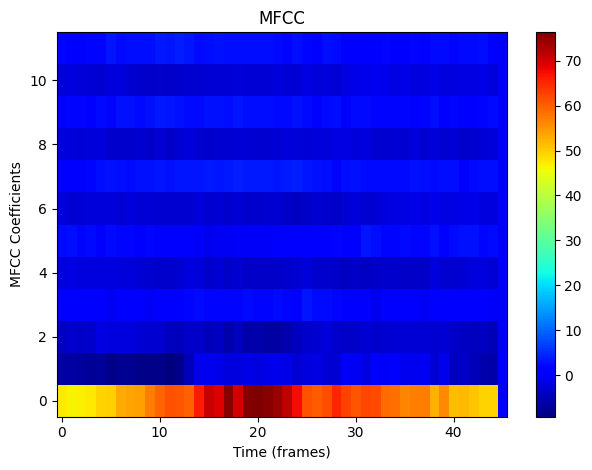

In [40]:
#PLOT MFCC
plt.imshow(mfcc_htk.T, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (frames)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout() 
plt.show() # desconmentar para ver el  plot